In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Dataset
url ='iris.txt'
names = ['x1', 'x2', 'x3', 'x4', 'class']
data = pd.read_csv(url, names=names)
data["class"]=data["class"].apply(lambda x:str(x).replace('Iris-setosa','1'))
data["class"]=data["class"].apply(lambda x:str(x).replace('Iris-versicolor','0'))
data["class"]=data["class"].astype('int64')
dataT0=data.iloc[0:40]
dataV0=data.iloc[40:50]
dataT1=data.iloc[50:90]
dataV1=data.iloc[90:100]
training=[dataT0,dataT1]
validasi=[dataV0,dataV1]
dataT = pd.concat(training,ignore_index=True)
dataV = pd.concat(validasi,ignore_index=True)
print(data)

     x1   x2   x3   x4  class
0   5.1  3.5  1.4  0.2      1
1   4.9  3.0  1.4  0.2      1
2   4.7  3.2  1.3  0.2      1
3   4.6  3.1  1.5  0.2      1
4   5.0  3.6  1.4  0.2      1
5   5.4  3.9  1.7  0.4      1
6   4.6  3.4  1.4  0.3      1
7   5.0  3.4  1.5  0.2      1
8   4.4  2.9  1.4  0.2      1
9   4.9  3.1  1.5  0.1      1
10  5.4  3.7  1.5  0.2      1
11  4.8  3.4  1.6  0.2      1
12  4.8  3.0  1.4  0.1      1
13  4.3  3.0  1.1  0.1      1
14  5.8  4.0  1.2  0.2      1
15  5.7  4.4  1.5  0.4      1
16  5.4  3.9  1.3  0.4      1
17  5.1  3.5  1.4  0.3      1
18  5.7  3.8  1.7  0.3      1
19  5.1  3.8  1.5  0.3      1
20  5.4  3.4  1.7  0.2      1
21  5.1  3.7  1.5  0.4      1
22  4.6  3.6  1.0  0.2      1
23  5.1  3.3  1.7  0.5      1
24  4.8  3.4  1.9  0.2      1
25  5.0  3.0  1.6  0.2      1
26  5.0  3.4  1.6  0.4      1
27  5.2  3.5  1.5  0.2      1
28  5.2  3.4  1.4  0.2      1
29  4.7  3.2  1.6  0.2      1
..  ...  ...  ...  ...    ...
70  5.9  3.2  4.8  1.8      0
71  6.1  2

In [7]:
#Variabel
tetha=np.array([0.2, 0.6, 0.3, 0.4])
bias = 0.9
alpha = 0.1 #0.8
epoch = 60
errvalue = 0.00000

In [8]:
#Fungsi
#h(x,tetha,b)
def h_function(x,tetha,bias):
    sum = 0
    for i in range(0, len(x)):
        sum+=x[i]*tetha[i]
    return sum+bias
#sigmoid
def sigmoid(f):
    sigm = 1/(1+math.exp(-f))
    return sigm
#Delta
def delta(sigm, kelas, x):
    delta = 2*(sigm-kelas)*(1-sigm)*sigm*x
    return delta
#prediksi
def predict(sigm):
    if sigm < 0.5:
        return 0
    else:
        return 1
#Error
def error(kelas, sigm):
    return (sigm-kelas)**2


In [9]:
#Data training
print("--Data Training--")
totalerrorT = 0.0000
saveTotalerrT = np.zeros(60)
saveEpoch = np.zeros(60)
for ep in range(0, epoch):
    totalerrorT = 0
    for j in range(0,80):
        x = np.array(dataT.iloc[j,0:4])
        kelas = dataT.iloc[j,4]
        fH = h_function(x,tetha,bias)
        sigm = sigmoid(fH)
        pred = predict(sigm)
        deltaT = delta(sigm,kelas,x)
        deltaB = delta(sigm,kelas,1)
        errvalue = error(kelas, sigm)
        totalerrorT += errvalue
        if j<79:
            for k in range(0,4):
                tetha[k] = tetha[k]-(alpha*deltaT[k])
            bias = bias-(alpha*deltaB)
        print("total error value : ",totalerrorT)
        saveTotalerrT[ep] = totalerrorT

#Data Validasi
print("--Data Validasi--")
totalerrorV = 0.0000
saveTotalerrV = np.zeros(60)
saveEpoch = np.zeros(60)
for ep in range(0, epoch):
    totalerrorV = 0
    for k in range(0,20):
        x = np.array(dataV.iloc[k,0:4])
        kelas = dataV.iloc[k,4]
        fH = h_function(x, tetha, bias)
        sigm = sigmoid(fH)
        pred = predict(sigm)
        errvalue = error(kelas, sigm)
        totalerrorV += errvalue
        
        print("total error value: ", totalerrorV)
        saveTotalerrV[ep] = totalerrorV

        saveEpoch[ep] = ep

--Data Training--
total error value :  0.00011603016816540489
total error value :  0.00034267964866233357
total error value :  0.0005474257777521767
total error value :  0.0007598355000358728
total error value :  0.0008658234990562871
total error value :  0.0009108697877592615
total error value :  0.0010560801640157355
total error value :  0.0011821632700852326
total error value :  0.0014884171216064494
total error value :  0.0016898771008044661
total error value :  0.0017643946608179406
total error value :  0.0018917378152587556
total error value :  0.0021406370417502768
total error value :  0.0025018375203697016
total error value :  0.0025542321342082786
total error value :  0.002578306580142036
total error value :  0.002633943231760767
total error value :  0.0027369777516547873
total error value :  0.0027842253053485927
total error value :  0.0028519316592695897
total error value :  0.002944756618361949
total error value :  0.003015032372229034
total error value :  0.003167560730700

total error value :  0.925214564625864
total error value :  0.9253833819132874
total error value :  0.9259092605368812
total error value :  0.927067739619272
total error value :  0.9279985605607758
total error value :  0.9282440916933277
total error value :  0.9284622049286936
total error value :  0.9293145202985501
total error value :  0.9348062859474205
total error value :  0.9369289960288494
total error value :  0.9395080808922359
total error value :  0.9415971261843038
total error value :  0.9417185381415158
total error value :  0.9428087384636573
total error value :  0.944188038751063
total error value :  0.9445358291153167
total error value :  0.9447690230346507
total error value :  0.9469653765233091
total error value :  0.9481750456951918
total error value :  0.11278225506152115
total error value :  0.19682679853744317
total error value :  0.22238567759440533
total error value :  0.2545731866421184
total error value :  0.2639490014748382
total error value :  0.2739146556259261


total error value :  0.15615791767566634
total error value :  0.15931956230523864
total error value :  0.15980278546823565
total error value :  0.16026939712489618
total error value :  0.16111882855891171
total error value :  0.16367273927617906
total error value :  0.16657539760176512
total error value :  0.16809075115298355
total error value :  0.17425283355572468
total error value :  0.17605692846385473
total error value :  0.1765458976366621
total error value :  0.184393602427133
total error value :  0.19215163908608504
total error value :  0.2003466851814776
total error value :  0.20362536385221633
total error value :  0.20532486515690468
total error value :  0.20693659384951785
total error value :  0.21114857777004267
total error value :  0.21620839477475143
total error value :  0.2182410163031039
total error value :  0.21853823016855795
total error value :  0.21872542458330857
total error value :  0.22206702561876787
total error value :  0.22327361958580916
total error value :  

total error value :  0.24351395504655585
total error value :  0.24435713971126294
total error value :  0.24448320555348682
total error value :  0.24456948130413608
total error value :  0.2450313025347023
total error value :  0.2532860662597523
total error value :  0.25488088286042915
total error value :  0.2572000308314857
total error value :  0.2591983974876833
total error value :  0.2592227688935039
total error value :  0.2597110548778001
total error value :  0.2608184286228871
total error value :  0.2610595973958966
total error value :  0.2611628316382098
total error value :  0.2631241854330046
total error value :  0.26386373732893964
total error value :  0.004183006644295982
total error value :  0.01696568140577777
total error value :  0.02178575128743279
total error value :  0.03239765837545951
total error value :  0.03448724484288134
total error value :  0.03755496129657501
total error value :  0.040861036978263945
total error value :  0.04508463959375385
total error value :  0.0

total error value :  0.06103543163028644
total error value :  0.06202088021611234
total error value :  0.0622047649063412
total error value :  0.06840645304081895
total error value :  0.07480204317371637
total error value :  0.08121272033371114
total error value :  0.08359471260448277
total error value :  0.08462286158087867
total error value :  0.08557381443712052
total error value :  0.08881374079876966
total error value :  0.09289389044590249
total error value :  0.09431923433368365
total error value :  0.0944627052529857
total error value :  0.09454509315249673
total error value :  0.09701145395031488
total error value :  0.09772056754564687
total error value :  0.09813467730606608
total error value :  0.10048321912028864
total error value :  0.10219497603358871
total error value :  0.103237552592437
total error value :  0.10521304655955467
total error value :  0.10846074801032346
total error value :  0.109044840589542
total error value :  0.1105570365344193
total error value :  0.

total error value :  0.10195165588315462
total error value :  0.10454881970271494
total error value :  0.10663861834023283
total error value :  0.10837897828413368
total error value :  0.1089428053843611
total error value :  0.10915767804856226
total error value :  0.12168926296562478
total error value :  0.12257689623761513
total error value :  0.12298702582079715
total error value :  0.12424190508037271
total error value :  0.1242779090309008
total error value :  0.12556802384729593
total error value :  0.12572931415294594
total error value :  0.12738057892421492
total error value :  0.12739840157860824
total error value :  0.12752783216141803
total error value :  0.1282192698270681
total error value :  0.12877905045052257
total error value :  0.128846124480091
total error value :  0.1288874288532292
total error value :  0.12914589297108028
total error value :  0.13633465668519223
total error value :  0.13743383490889663
total error value :  0.13916197291497895
total error value :  0

total error value :  0.02639436210679527
total error value :  0.027046038507403978
total error value :  0.02786232146714875
total error value :  0.028236925160451936
total error value :  0.03063666424214683
total error value :  0.03118190536430694
total error value :  0.031265571902188365
total error value :  0.035578508601586845
total error value :  0.040214913125348084
total error value :  0.04480500445916179
total error value :  0.046436212667960435
total error value :  0.04706639756123966
total error value :  0.04764253585765924
total error value :  0.04997130538423688
total error value :  0.05300096201513999
total error value :  0.05396297800682168
total error value :  0.05404035466049174
total error value :  0.05408216147396061
total error value :  0.055828464436640836
total error value :  0.05626815071696484
total error value :  0.05651227195275123
total error value :  0.05820093302972406
total error value :  0.05941580305889426
total error value :  0.0601292168951262
total erro

total error value :  0.08279675243299339
total error value :  0.08288709215774448
total error value :  0.0840686657820647
total error value :  0.08407781522035661
total error value :  0.08415488352478995
total error value :  0.08463153933277658
total error value :  0.08501572713822002
total error value :  0.08505574780908062
total error value :  0.08507880280204094
total error value :  0.0852395006288562
total error value :  0.09120861379608589
total error value :  0.09200451763184592
total error value :  0.09331926407961953
total error value :  0.09447370932074195
total error value :  0.09447893142636674
total error value :  0.09465612827318243
total error value :  0.09520714429452205
total error value :  0.09531400682778612
total error value :  0.09535079373928662
total error value :  0.09646018117168023
total error value :  0.09680200846568189
total error value :  0.0006275260380313295
total error value :  0.0035143940605768475
total error value :  0.004532915709576561
total error v

total error value :  0.024353565890682053
total error value :  0.028032482512376465
total error value :  0.03165131337653222
total error value :  0.0329006833294987
total error value :  0.033352160703991246
total error value :  0.03376211278560405
total error value :  0.035597880303519326
total error value :  0.03803135804019984
total error value :  0.03875855124980126
total error value :  0.03880975345988411
total error value :  0.03883640313182494
total error value :  0.04019867582936716
total error value :  0.040515892373974245
total error value :  0.04068604183222285
total error value :  0.04201367873605193
total error value :  0.042965101124949216
total error value :  0.04350818406400342
total error value :  0.04384109420873909
total error value :  0.044460236964279656
total error value :  0.04454868530512609
total error value :  0.04484731289708278
total error value :  0.044956524638038245
total error value :  0.04515117872369729
total error value :  0.045467222101992714
total er

total error value :  0.03975557273213451
total error value :  0.04768037140639524
total error value :  0.04781131399065008
total error value :  0.04879659683334202
total error value :  0.04965979102161384
total error value :  0.05033975436541361
total error value :  0.05055641053092692
total error value :  0.0506225876645591
total error value :  0.05772260839917279
total error value :  0.058137671607818436
total error value :  0.058290956431442484
total error value :  0.058902697294712675
total error value :  0.058913715486032275
total error value :  0.059543736487857456
total error value :  0.05959852076728275
total error value :  0.06046945423583056
total error value :  0.060474623245362
total error value :  0.06052361352964548
total error value :  0.060863416417307
total error value :  0.06113573436995259
total error value :  0.06116107655368904
total error value :  0.0611749147387696
total error value :  0.06128040288360013
total error value :  0.0662361476335231
total error value 

total error value :  0.014025561748409854
total error value :  0.015350093038138616
total error value :  0.015623291091085467
total error value :  0.015657889236882702
total error value :  0.018386186612069092
total error value :  0.02143906267734841
total error value :  0.024425481298697586
total error value :  0.02543262523085002
total error value :  0.025778342310307213
total error value :  0.02609059216458436
total error value :  0.02760201299188079
total error value :  0.02963302776190458
total error value :  0.03021156460774418
total error value :  0.030248374368288346
total error value :  0.03026698893822531
total error value :  0.031377792655565645
total error value :  0.031621533050590435
total error value :  0.031748675262664755
total error value :  0.032836664166271255
total error value :  0.03361489195070432
total error value :  0.034048511375595454
total error value :  0.03426406367054878
total error value :  0.03467266285019817
total error value :  0.034727025542190953
to

total error value :  0.01358825804108222
total error value :  0.013828409290036333
total error value :  0.013857795551461608
total error value :  0.01635842186600313
total error value :  0.019174892380032754
total error value :  0.021922961501317822
total error value :  0.022840264308507958
total error value :  0.023148337133466874
total error value :  0.02342594836216965
total error value :  0.024814526897926285
total error value :  0.026690901040627074
total error value :  0.02721447621295693
total error value :  0.027246391495156112
total error value :  0.02726233453904439
total error value :  0.0282782099270075
total error value :  0.02849559091439779
total error value :  0.02860761690953833
total error value :  0.029604484826673265
total error value :  0.03031710980759
total error value :  0.030709925574822907
total error value :  0.030890449469466244
total error value :  0.031235091708724374
total error value :  0.03127958874383917
total error value :  0.0314432602930106
total er

total error value :  0.04202026534631733
total error value :  0.04230788475778796
total error value :  0.0424045484444037
total error value :  0.04283684499617922
total error value :  0.04284319524540687
total error value :  0.043288351201811535
total error value :  0.04332124167043425
total error value :  0.04395382430671004
total error value :  0.043956715275026294
total error value :  0.043987462414046684
total error value :  0.04422570566537112
total error value :  0.04441526759994725
total error value :  0.04443105208154444
total error value :  0.044439229547229196
total error value :  0.04450740531331091
total error value :  0.048545964561773174
total error value :  0.0489801128652822
total error value :  0.049754433581181895
total error value :  0.05043283621565614
total error value :  0.050434505409736805
total error value :  0.05051314431262307
total error value :  0.05080260267067249
total error value :  0.05085408446552473
total error value :  0.05086997865124021
total error

total error value :  0.03927949030515115
total error value :  0.03968319105801497
total error value :  0.039711702789129326
total error value :  0.04028948691286415
total error value :  0.0402919440014099
total error value :  0.040318917597060286
total error value :  0.04053433863985587
total error value :  0.040705365131050934
total error value :  0.0407191758580972
total error value :  0.040726227842517095
total error value :  0.04078650017022856
total error value :  0.0445926420619304
total error value :  0.04498982317391869
total error value :  0.04570550712658465
total error value :  0.04633190006597811
total error value :  0.046333317988125094
total error value :  0.04640319447229376
total error value :  0.04666613684365886
total error value :  0.046712320695722884
total error value :  0.04672638085160269
total error value :  0.04731543800030601
total error value :  0.04747481264242404
total error value :  0.0002091550599249307
total error value :  0.0014108428433171295
total err

total error value :  0.04315775131885325
total error value :  0.04319946988658901
total error value :  0.043212009271347177
total error value :  0.04375694034801599
total error value :  0.04390228338368882
--Data Validasi--
total error value:  0.00013809575833233153
total error value:  0.00917498334581313
total error value:  0.00954589921139511
total error value:  0.01040154395497483
total error value:  0.011273037821640795
total error value:  0.012562212523763805
total error value:  0.012725537361832847
total error value:  0.013296917820582024
total error value:  0.013439313818024117
total error value:  0.013821110493355288
total error value:  0.013858590033871689
total error value:  0.013907692445960868
total error value:  0.014157545936158337
total error value:  0.016726986618769576
total error value:  0.016845160312765766
total error value:  0.017244772627450784
total error value:  0.017487299552922206
total error value:  0.017650700967567077
total error value:  0.03349662813936681

total error value:  0.014157545936158337
total error value:  0.016726986618769576
total error value:  0.016845160312765766
total error value:  0.017244772627450784
total error value:  0.017487299552922206
total error value:  0.017650700967567077
total error value:  0.03349662813936681
total error value:  0.03376727965467735
total error value:  0.00013809575833233153
total error value:  0.00917498334581313
total error value:  0.00954589921139511
total error value:  0.01040154395497483
total error value:  0.011273037821640795
total error value:  0.012562212523763805
total error value:  0.012725537361832847
total error value:  0.013296917820582024
total error value:  0.013439313818024117
total error value:  0.013821110493355288
total error value:  0.013858590033871689
total error value:  0.013907692445960868
total error value:  0.014157545936158337
total error value:  0.016726986618769576
total error value:  0.016845160312765766
total error value:  0.017244772627450784
total error value: 

total error value:  0.017650700967567077
total error value:  0.03349662813936681
total error value:  0.03376727965467735
total error value:  0.00013809575833233153
total error value:  0.00917498334581313
total error value:  0.00954589921139511
total error value:  0.01040154395497483
total error value:  0.011273037821640795
total error value:  0.012562212523763805
total error value:  0.012725537361832847
total error value:  0.013296917820582024
total error value:  0.013439313818024117
total error value:  0.013821110493355288
total error value:  0.013858590033871689
total error value:  0.013907692445960868
total error value:  0.014157545936158337
total error value:  0.016726986618769576
total error value:  0.016845160312765766
total error value:  0.017244772627450784
total error value:  0.017487299552922206
total error value:  0.017650700967567077
total error value:  0.03349662813936681
total error value:  0.03376727965467735
total error value:  0.00013809575833233153
total error value: 

total error value:  0.017650700967567077
total error value:  0.03349662813936681
total error value:  0.03376727965467735
total error value:  0.00013809575833233153
total error value:  0.00917498334581313
total error value:  0.00954589921139511
total error value:  0.01040154395497483
total error value:  0.011273037821640795
total error value:  0.012562212523763805
total error value:  0.012725537361832847
total error value:  0.013296917820582024
total error value:  0.013439313818024117
total error value:  0.013821110493355288
total error value:  0.013858590033871689
total error value:  0.013907692445960868
total error value:  0.014157545936158337
total error value:  0.016726986618769576
total error value:  0.016845160312765766
total error value:  0.017244772627450784
total error value:  0.017487299552922206
total error value:  0.017650700967567077
total error value:  0.03349662813936681
total error value:  0.03376727965467735
total error value:  0.00013809575833233153
total error value: 

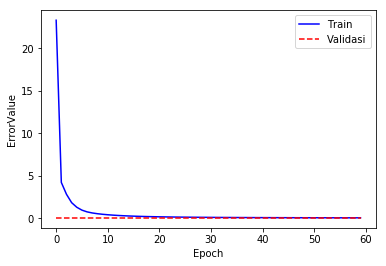

In [10]:
xAxis = saveEpoch
yTrain = saveTotalerrT
yVali = saveTotalerrV

plt.plot(yTrain,'b', yVali, 'r--')
plt.xlabel('Epoch')
plt.ylabel('ErrorValue')
plt.legend(['Train','Validasi'])
plt.show()